# Moyenne multi-modèles simple

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-05-05T12:50:13.706762+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [3]:
%watermark --iversions

numpy     : 2.0.2
watermark : 2.5.0
pandas    : 2.2.3
cartopy   : 0.24.0
xarray    : 2025.1.1
matplotlib: 3.10.0



In [4]:
# je définis mes données
def get_data(path_snc, path_areacella, path_sftlf):
    ds_snc = xr.open_dataset(path_snc)
    ds_area = xr.open_dataset(path_areacella)
    ds_sftlf = xr.open_dataset(path_sftlf)
    return ds_snc, ds_area, ds_sftlf

def extraction_variable(ds_snc, variable="sncbin", lat_min=20):
    snc = ds_snc[variable]

    if lat_min is not None:
        snc = snc.sel(lat=snc.lat>=lat_min)

    snc = snc.where(snc< 1e19, float("nan"))

    max_val = snc.max().item()
    if max_val > 1.5:
        print(f"La variable '{variable}' est en %. Conversion en fraction.")
        snc = snc/100

    if sftlf is not None:
        snc = snc.where(sftlf>0)

    snc = snc.clip(0, 1)

    return snc

In [5]:
files = os.listdir("/home/jovyan/private-storage/interp_models_SW/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_SW_reprojete.nc',
 'CanESM5_SW_reprojete.nc',
 'CanESM5-CanOE_SW_reprojete.nc',
 'CESM2_SW_reprojete.nc',
 'CESM2-WACCM_SW_reprojete.nc',
 'CIESM_SW_reprojete.nc',
 'CNRM-CM6-1_SW_reprojete.nc',
 'CNRM-CM6-1-HR_SW_reprojete.nc',
 'CNRM-ESM2-1_SW_reprojete.nc',
 'EC-Earth3_SW_reprojete.nc',
 'EC-Earth3-Veg_SW_reprojete.nc',
 'FGOALS-f3-L_SW_reprojete.nc',
 'FGOALS-g3_SW_reprojete.nc',
 'GFDL-CM4_SW_reprojete.nc',
 'GISS-E2-1-G_SW_reprojete.nc',
 'HadGEM3-GC31-LL_SW_reprojete.nc',
 'IPSL-CM6A-LR_SW_reprojete.nc',
 'MIROC-ES2L_SW_reprojete.nc',
 'MIROC6_SW_reprojete.nc',
 'MPI-ESM1-2-HR_SW_reprojete.nc',
 'MPI-ESM1-2-LR_SW_reprojete.nc',
 'MRI-ESM2-0_SW_reprojete.nc',
 'NorESM2-LM_SW_reprojete.nc',
 'NorESM2-MM_SW_reprojete.nc',
 'UKESM1-0-LL_SW_reprojete.nc']

## Moyenne multi-modèles en excluant totalement les mauvais modèles

In [6]:
excluded_models = ["EC-Earth3", "EC-Earth3-Veg", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR"]

filtered_nc_files = [f for f in nc_files if not any(model in f for model in excluded_models)]

In [7]:
#fig, axes = plt.subplots(5, 5, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
#axes = axes.flatten()
snow_cover_dict = {}

for i, files in enumerate(filtered_nc_files):
    model_name = files.split("_")[0]
    
    path_snc = os.path.join("/home/jovyan/private-storage/interp_models_SW/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", files.replace("SW_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/interp_sftlf_bis/", files.replace("SW", "sftlf"))
                                 
    ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
    sftlf = ds_sftlf["sftlf"]
    snc = extraction_variable(ds_snc)

    snow_cover_dict[model_name] = snc

La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variabl

In [8]:
for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        print(f"{model}: {da['type'].values}")

CanESM5: b'land'
CNRM-CM6-1: b'typeland'
CNRM-CM6-1-HR: b'typeland'
CNRM-ESM2-1: b'typeland'
GISS-E2-1-G: b'land'
HadGEM3-GC31-LL: b'land'
IPSL-CM6A-LR: b'typeland'
MIROC-ES2L: b'land'
MIROC6: b'land'
MRI-ESM2-0: b'land'
UKESM1-0-LL: b'land'


In [9]:
cleaned_snc = []
model_names = []

for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        da = da.drop_vars('type')

    cleaned_snc.append(da)
    model_names.append(model)

In [10]:
all_snc = xr.concat(cleaned_snc, dim=xr.DataArray(model_names, dims="model"))

In [11]:
all_snc

<xarray.DataArray 'sncbin' (model: 21, GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 584MB
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * model    (model) <U15 1kB 'BCC-CSM2-MR' 'CanESM5' ... 'UKESM1-0-LL'

In [12]:
mean_snc = all_snc.mean(dim="model")

In [13]:
snc_0_85 = mean_snc.interp(GSAT=0.85, month=[1,2,3])
snc_0_85

<xarray.DataArray 'sncbin' (month: 3, lat: 70, lon: 360)> Size: 605kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    GSAT     float64 8B 0.85
  * month    (month) int64 24B 1 2 3

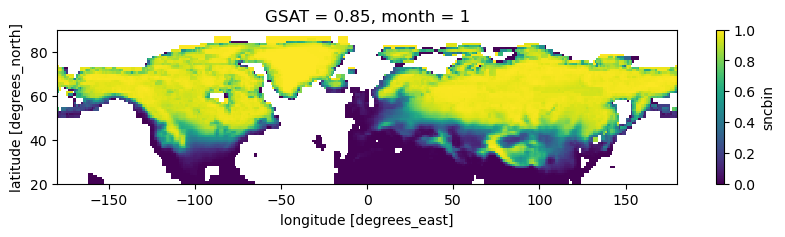

In [14]:
plt.figure(figsize=(10,2))
snc_0_85[0].plot()

In [15]:
snc_gsat2 = mean_snc.sel(GSAT=2.0, method="nearest")
snc_gsat3 = mean_snc.sel(GSAT=3.0, method="nearest")
snc_gsat4 = mean_snc.sel(GSAT=4.0, method="nearest")
snc_gsat5 = mean_snc.sel(GSAT=5.0, method="nearest")

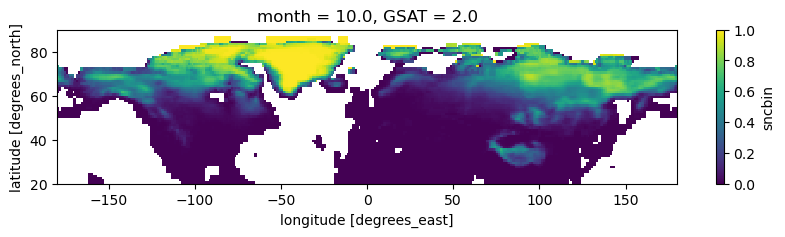

In [16]:
plt.figure(figsize=(10,2))
snc_gsat2[9].plot()

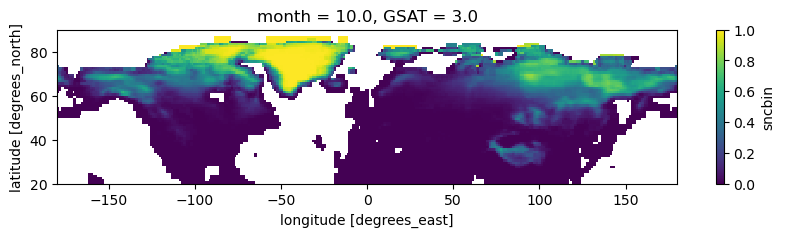

In [17]:
plt.figure(figsize=(10,2))
snc_gsat3[9].plot()

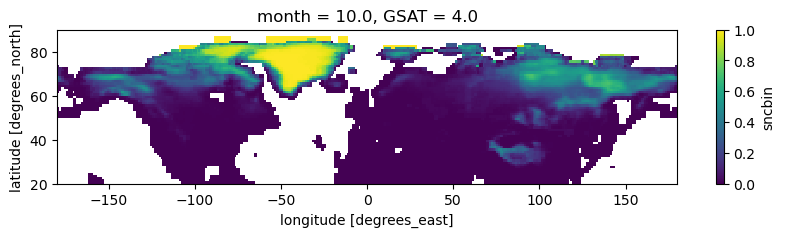

In [18]:
plt.figure(figsize=(10,2))
snc_gsat4[9].plot()

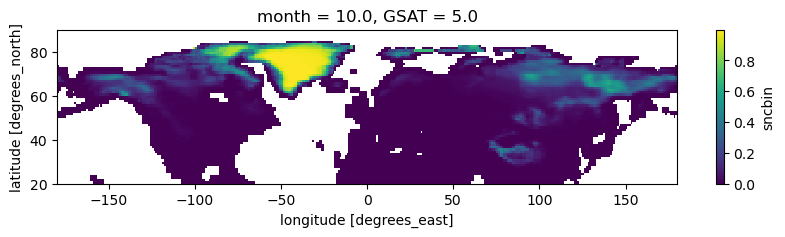

In [19]:
plt.figure(figsize=(10,2))
snc_gsat5[9].plot()

In [20]:
# 10% de neige

In [21]:
# création d'une nouvelle variable où présence neige = 1 et absence = 0 
snc_binary_10 = xr.where(mean_snc > 0.1, 1, 0)

#on garde les nan initiaux
snc_binary_10 = snc_binary_10.where(~mean_snc.isnull())

In [22]:
snc_gsat2_binary_10 = snc_binary_10.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_10 = snc_binary_10.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_10 = snc_binary_10.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_10 = snc_binary_10.sel(GSAT=5.0, method="nearest")

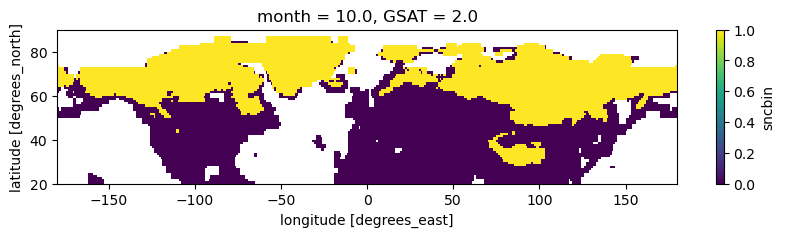

In [23]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_10[9].plot()

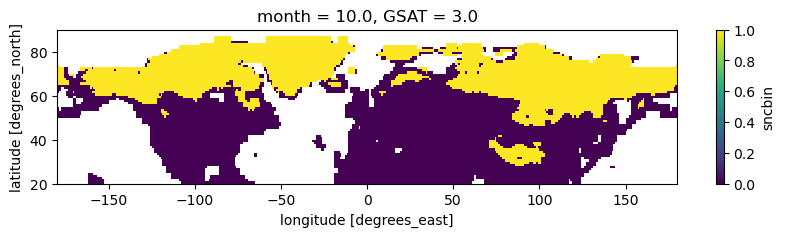

In [24]:
plt.figure(figsize=(10,2))
snc_gsat3_binary_10[9].plot()

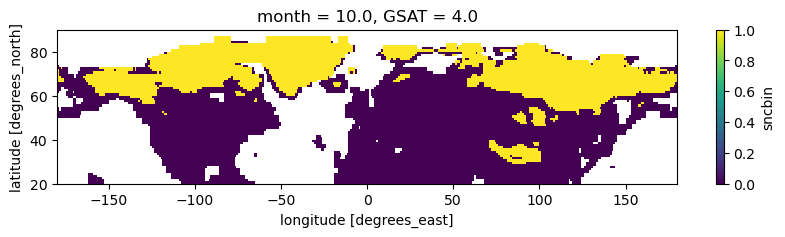

In [25]:
plt.figure(figsize=(10,2))
snc_gsat4_binary_10[9].plot()

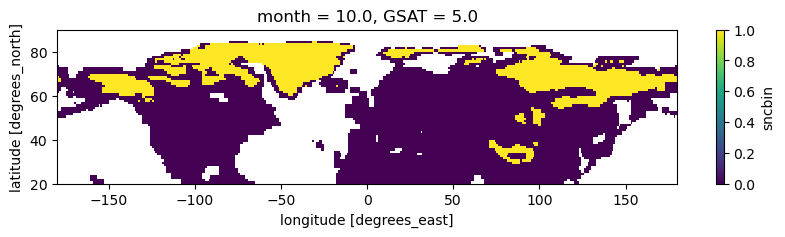

In [26]:
plt.figure(figsize=(10,2))
snc_gsat5_binary_10[9].plot()

In [27]:
# 25% de neige

In [28]:
snc_binary_25 = xr.where(mean_snc >= 0.25, 1, 0)

#on garde les nan initiaux
snc_binary_25 = snc_binary_25.where(~mean_snc.isnull())

In [29]:
snc_gsat2_binary_25 = snc_binary_25.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_25 = snc_binary_25.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_25 = snc_binary_25.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_25 = snc_binary_25.sel(GSAT=5.0, method="nearest")

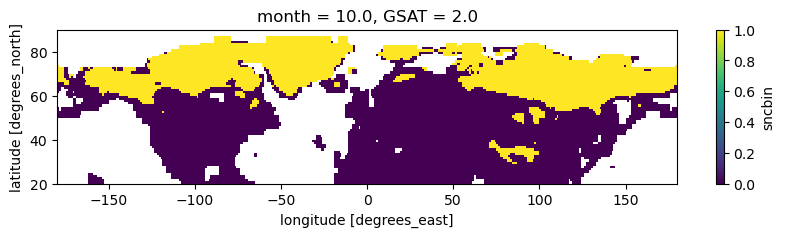

In [30]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_25[9].plot()

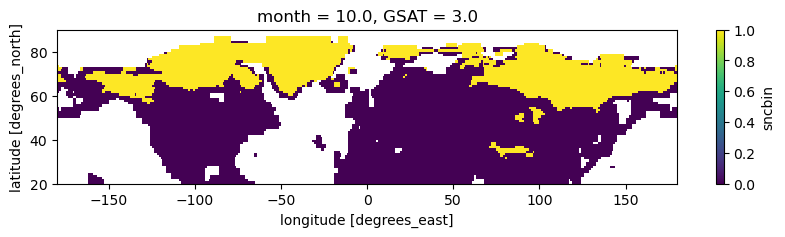

In [31]:
plt.figure(figsize=(10,2))
snc_gsat3_binary_25[9].plot()

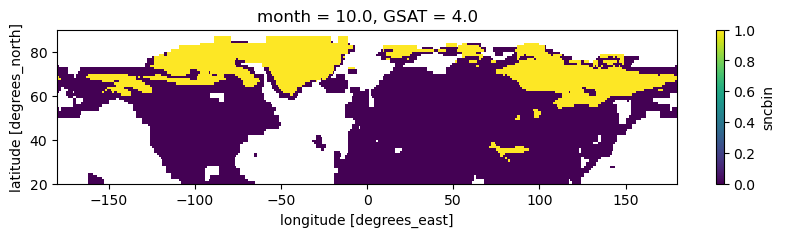

In [32]:
plt.figure(figsize=(10,2))
snc_gsat4_binary_25[9].plot()

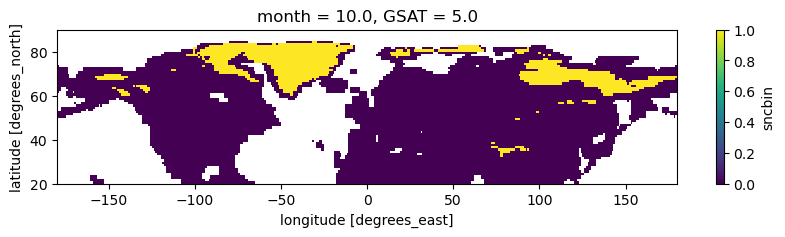

In [33]:
plt.figure(figsize=(10,2))
snc_gsat5_binary_25[9].plot()

In [34]:
# 50% de neige

In [35]:
snc_binary_50 = xr.where(mean_snc >= 0.5, 1, 0)

#on garde les nan initiaux
snc_binary_50 = snc_binary_50.where(~mean_snc.isnull())

In [36]:
snc_gsat2_binary_50 = snc_binary_50.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_50 = snc_binary_50.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_50 = snc_binary_50.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_50 = snc_binary_50.sel(GSAT=5.0, method="nearest")

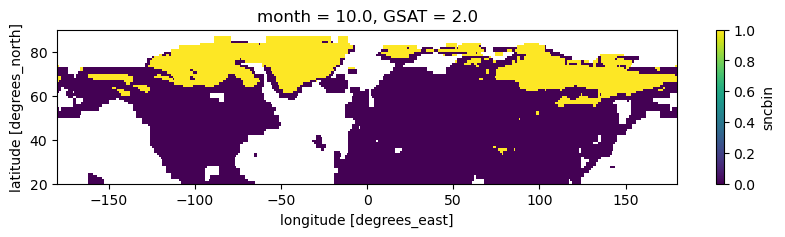

In [37]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_50[9].plot()

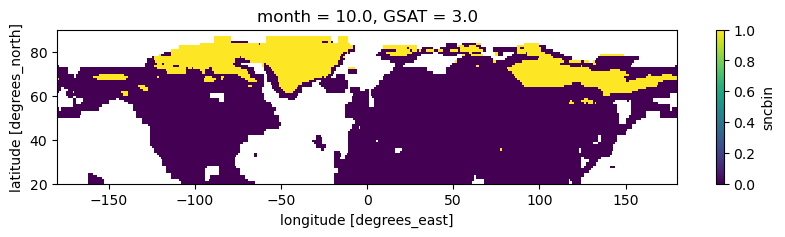

In [38]:
plt.figure(figsize=(10,2))
snc_gsat3_binary_50[9].plot()

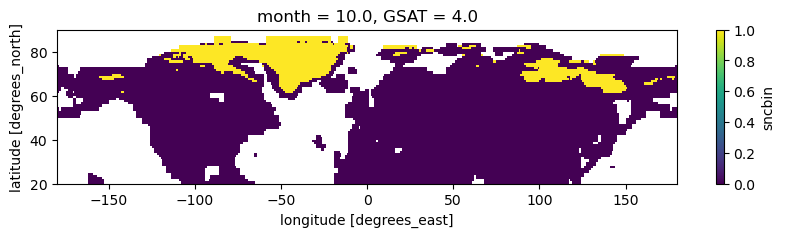

In [39]:
plt.figure(figsize=(10,2))
snc_gsat4_binary_50[9].plot()

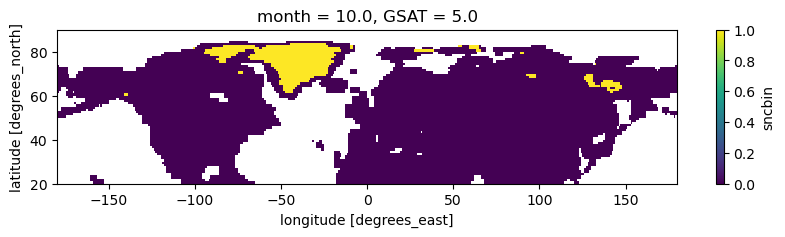

In [40]:
plt.figure(figsize=(10,2))
snc_gsat5_binary_50[9].plot()

In [41]:
# 75% de neige

In [42]:
snc_binary_75 = xr.where(mean_snc >= 0.75, 1, 0)

#on garde les nan initiaux
snc_binary_75 = snc_binary_75.where(~mean_snc.isnull())

In [43]:
snc_gsat2_binary_75 = snc_binary_75.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_75 = snc_binary_75.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_75 = snc_binary_75.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_75 = snc_binary_75.sel(GSAT=5.0, method="nearest")

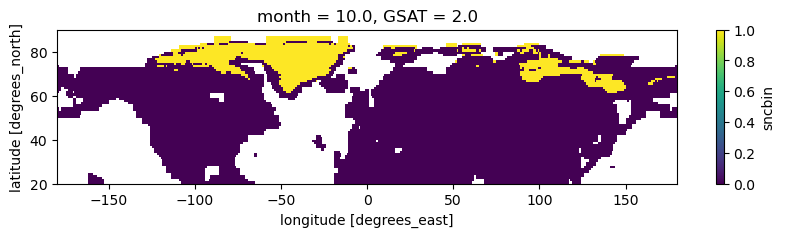

In [44]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_75[9].plot()

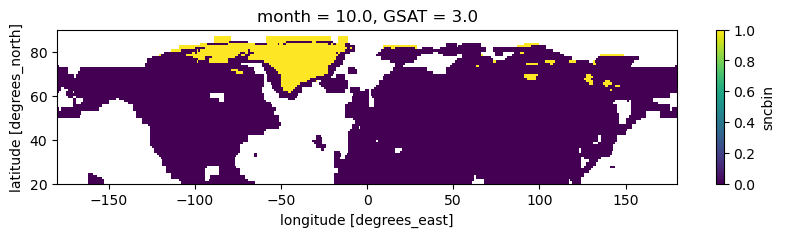

In [45]:
plt.figure(figsize=(10,2))
snc_gsat3_binary_75[9].plot()

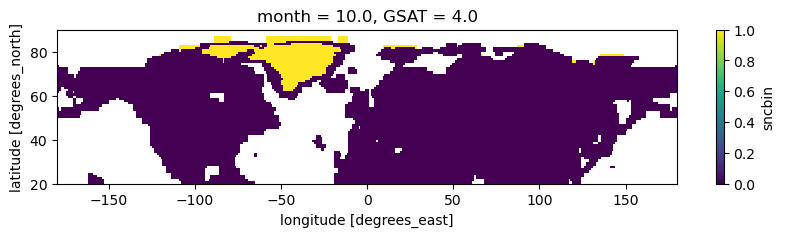

In [46]:
plt.figure(figsize=(10,2))
snc_gsat4_binary_75[9].plot()

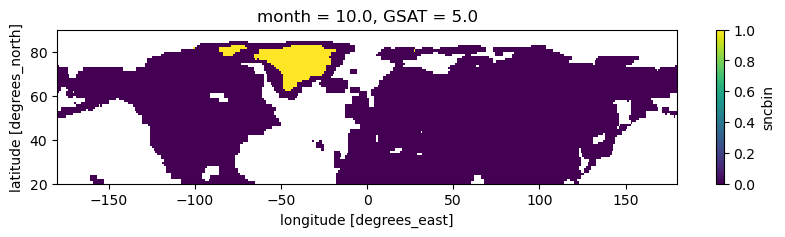

In [47]:
plt.figure(figsize=(10,2))
snc_gsat5_binary_75[9].plot()

In [48]:
# 90% de neige

In [49]:
snc_binary_90 = xr.where(mean_snc >= 0.9, 1, 0)

#on garde les nan initiaux
snc_binary_90 = snc_binary_90.where(~mean_snc.isnull())

In [50]:
snc_gsat2_binary_90 = snc_binary_90.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_90 = snc_binary_90.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_90 = snc_binary_90.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_90 = snc_binary_90.sel(GSAT=5.0, method="nearest")

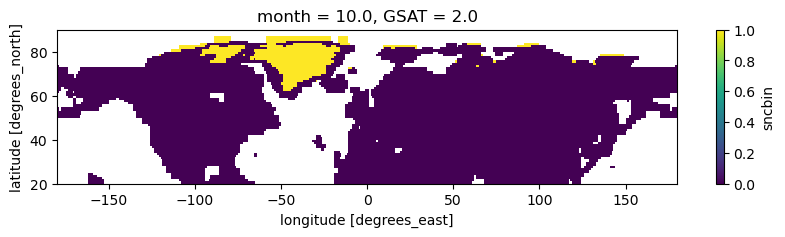

In [51]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_90[9].plot()

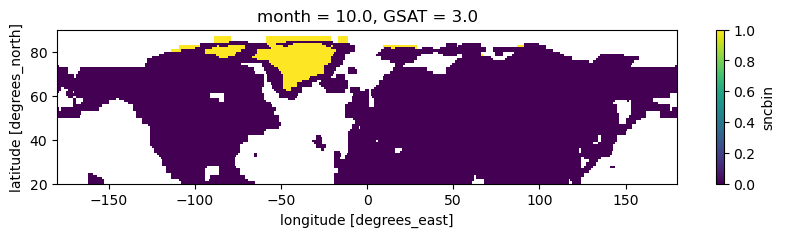

In [52]:
plt.figure(figsize=(10,2))
snc_gsat3_binary_90[9].plot()

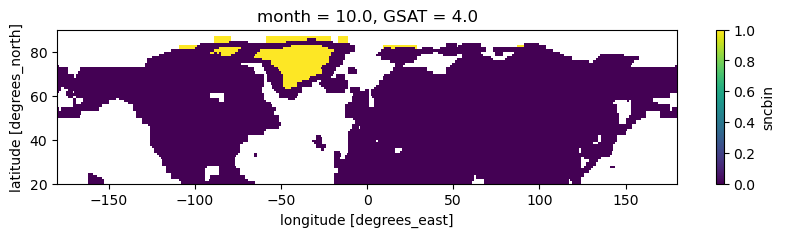

In [53]:
plt.figure(figsize=(10,2))
snc_gsat4_binary_90[9].plot()

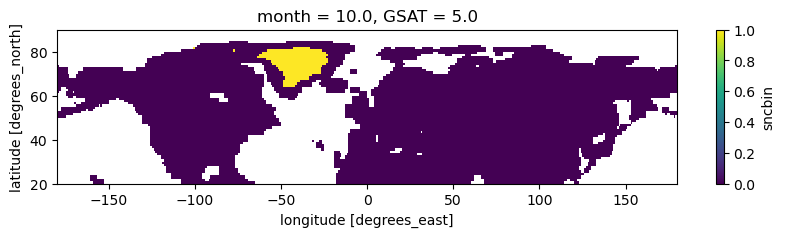

In [54]:
plt.figure(figsize=(10,2))
snc_gsat5_binary_90[9].plot()

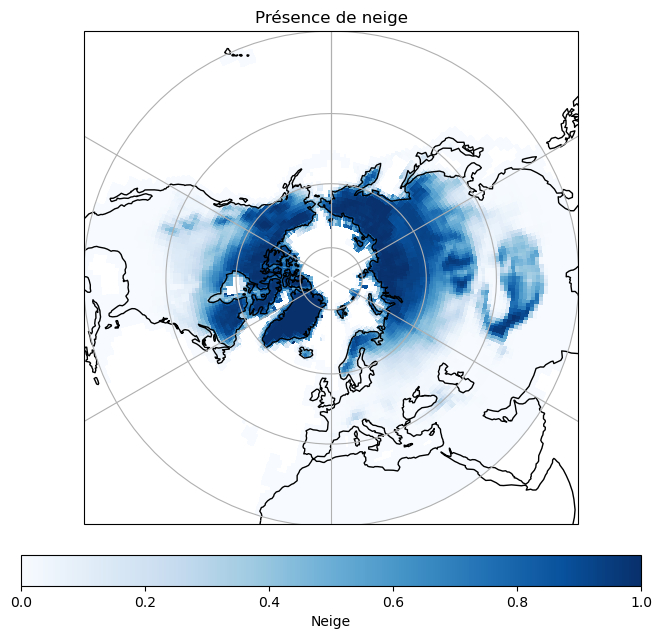

In [55]:
#pour mois de janvier
da = snc_gsat5.sel(month=3)

#récup coordonnées
lon = da.lon.values
lat = da.lat.values
data = da.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Neige')
plt.title('Présence de neige')
plt.show()

/tmp/ipykernel_80/1000041138.py:11: RuntimeWarning: invalid value encountered in cast
  da2.values.astype(int) +
/tmp/ipykernel_80/1000041138.py:12: RuntimeWarning: invalid value encountered in cast
  da3.values.astype(int) +
/tmp/ipykernel_80/1000041138.py:13: RuntimeWarning: invalid value encountered in cast
  da4.values.astype(int) +
/tmp/ipykernel_80/1000041138.py:14: RuntimeWarning: invalid value encountered in cast
  da5.values.astype(int)


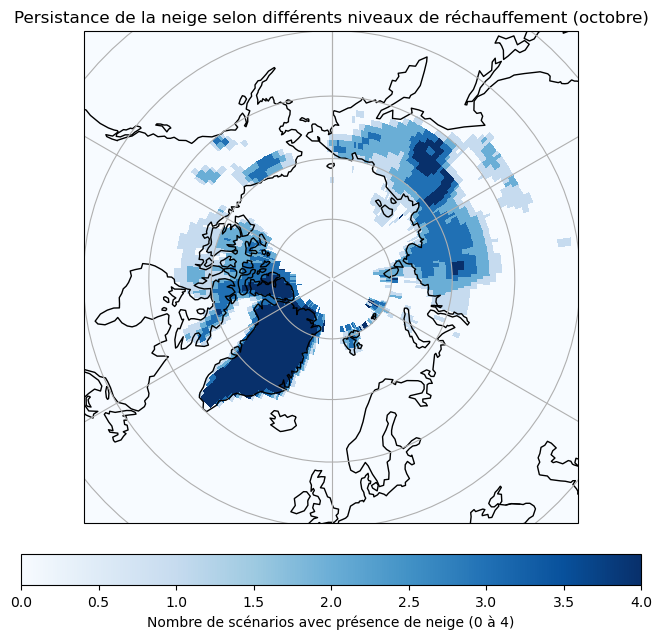

In [56]:
da5 = snc_gsat5_binary_50[9]
da4 = snc_gsat4_binary_50[9]
da3 = snc_gsat3_binary_50[9]
da2 = snc_gsat2_binary_50[9]

lon = da5.lon.values
lat = da5.lat.values

#"score de persistance de neige"
snow_persistence = (
	da2.values.astype(int) +
	da3.values.astype(int) +
	da4.values.astype(int) +
	da5.values.astype(int)
)

# Carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

# couleur
cmap = plt.cm.Blues 
norm = plt.Normalize(vmin=0, vmax=4)  # 0 = pas de neige, 4 = neige dans tous les scénarios

contour = ax.pcolormesh(lon, lat, snow_persistence, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, shading='auto')

# Ajouts traits de cote
ax.coastlines()
ax.gridlines(draw_labels=False)

cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Nombre de scénarios avec présence de neige (0 à 4)')
plt.title("Persistance de la neige selon différents niveaux de réchauffement (octobre)")
plt.show()


NameError: name 'mpatches' is not defined

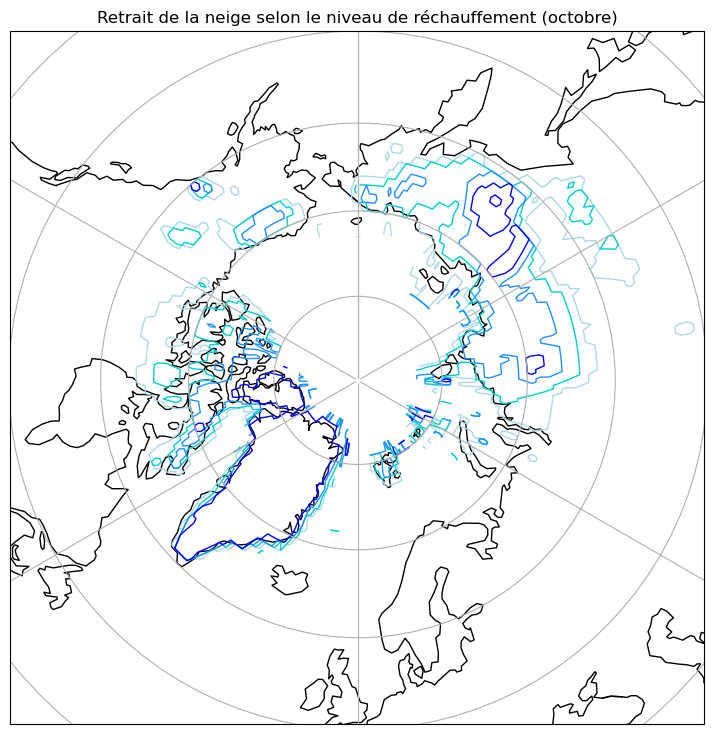

In [57]:
da2 = snc_gsat2_binary_50[9]
da3 = snc_gsat3_binary_50[9]
da4 = snc_gsat4_binary_50[9]
da5 = snc_gsat5_binary_50[9]

# Coordonnées
lon = da2.lon.values
lat = da2.lat.values

# Données binaires (0 ou 1)
data2 = da2.values
data3 = da3.values
data4 = da4.values
data5 = da5.values

# Carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(9, 9))
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

# isohypses
c2 = ax.contour(lon, lat, data2, levels=[0.5], colors='lightblue', transform=ccrs.PlateCarree(), linewidths=1)
c3 = ax.contour(lon, lat, data3, levels=[0.5], colors='darkturquoise', transform=ccrs.PlateCarree(), linewidths=1)
c4 = ax.contour(lon, lat, data4, levels=[0.5], colors='dodgerblue', transform=ccrs.PlateCarree(), linewidths=1)
c5 = ax.contour(lon, lat, data5, levels=[0.5], colors='blue', transform=ccrs.PlateCarree(), linewidths=1)

# ajout traits de cote
ax.coastlines()
ax.gridlines(draw_labels=False)
plt.title("Retrait de la neige selon le niveau de réchauffement (octobre)")

# Légende
patches = [
	mpatches.Patch(color='lightblue', label='2°'),
	mpatches.Patch(color='darkturquoise', label='3°'),
	mpatches.Patch(color='dodgerblue', label='4°'),
	mpatches.Patch(color='blue', label='5°')
]
plt.legend(handles=patches, loc='lower left', frameon=True)

plt.show()

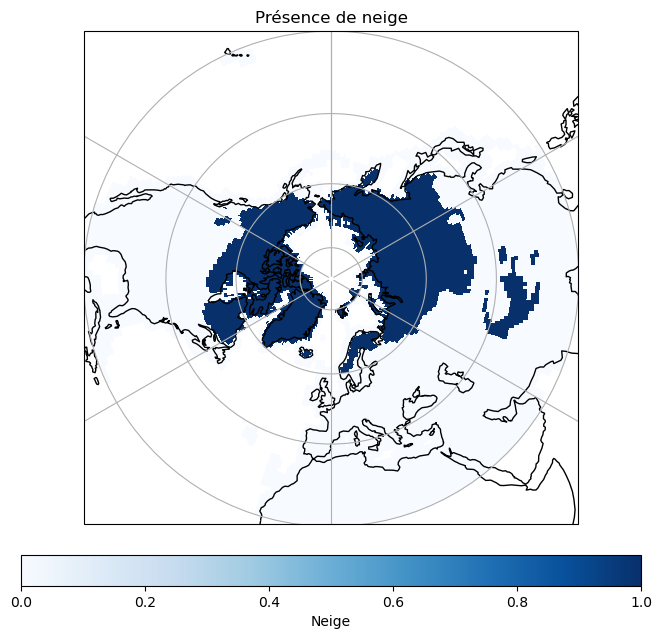

In [59]:
#pour mois de janvier
da = snc_gsat5_binary_50.sel(month=3)

#récup coordonnées
lon = da.lon.values
lat = da.lat.values
data = da.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Neige')
plt.title('Présence de neige')
plt.show()

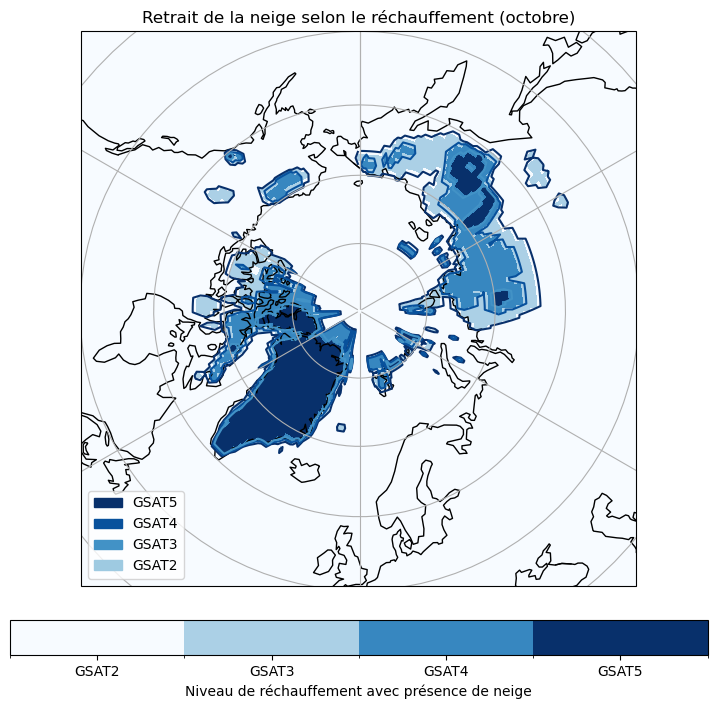

In [80]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# Données binaires 0/1 pour octobre
da2 = snc_gsat2_binary_50[9].values
da3 = snc_gsat3_binary_50[9].values
da4 = snc_gsat4_binary_50[9].values
da5 = snc_gsat5_binary_50.sel(month=10).values

lon = snc_gsat2_binary_50[9].lon.values
lat = snc_gsat2_binary_50[9].lat.values

# Carte du niveau maximal de réchauffement supporté avec neige
# 1 = GSAT2, 2 = GSAT3, 3 = GSAT4, 4 = GSAT5
# On commence par 0 (pas de neige à aucun scénario)
data = np.zeros_like(da2)

# On remplit dans l'ordre croissant de réchauffement
data[da2 == 1] = 1  # Neige déjà sous GSAT2
data[da3 == 1] = 2  # Neige encore sous GSAT3
data[da4 == 1] = 3  # ...
data[da5 == 1] = 4  # Neige résiste jusqu'à GSAT5

# Carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(9, 9))
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

# Dégradé de bleu clair → foncé selon réchauffement
cmap = plt.cm.Blues
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]  # Pour bien séparer les 4 niveaux
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Remplissage
cf = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')

# Contours nets pour chaque seuil
contour_colors = ['#08306B', '#08519C', '#4292C6', '#9ECAE1']  # Du foncé au clair
levels = [1, 2, 3, 4]

for lvl, col in zip(levels, contour_colors):
	ax.contour(lon, lat, data, levels=[lvl], colors=[col], linewidths=1.5, transform=ccrs.PlateCarree())

# Coastlines, grilles
ax.coastlines()
ax.gridlines(draw_labels=False)

# Légende personnalisée
patches = [
	mpatches.Patch(color='#08306B', label='GSAT5'),
	mpatches.Patch(color='#08519C', label='GSAT4'),
	mpatches.Patch(color='#4292C6', label='GSAT3'),
	mpatches.Patch(color='#9ECAE1', label='GSAT2'),
]
plt.legend(handles=patches, loc='lower left')

# Titre et barre de couleur
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.05, ticks=[1, 2, 3, 4])
cbar.set_ticklabels(['GSAT2', 'GSAT3', 'GSAT4', 'GSAT5'])
cbar.set_label('Niveau de réchauffement avec présence de neige')
plt.title("Retrait de la neige selon le réchauffement (octobre)")

plt.show()

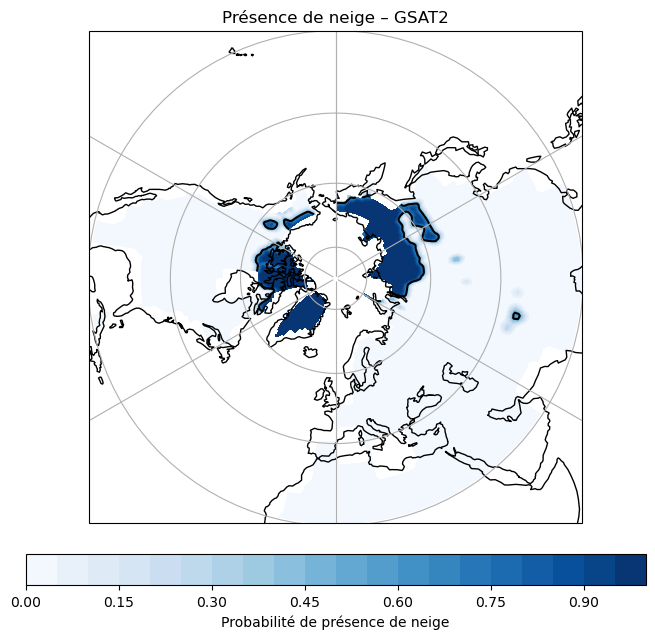

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.ndimage import gaussian_filter

# Donnée brute (valeurs entre 0 et 1 si c’est une moyenne de binaire)
da = snc_gsat2_binary_50[9]
lon = da.lon.values
lat = da.lat.values
data = da.values.astype(float)

# Lissage pour éviter l’effet pixelisé
smoothed = gaussian_filter(data, sigma=1.0)

# Carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

# Fond en dégradé bleu
cmap = plt.cm.Blues
cf = ax.contourf(lon, lat, smoothed, levels=20, cmap=cmap, transform=ccrs.PlateCarree())

# Contour à 50% (isoneige)
ax.contour(lon, lat, smoothed, levels=[0.5], colors='black', linewidths=1.5, transform=ccrs.PlateCarree())

# Coastlines et décor
ax.coastlines()
ax.gridlines(draw_labels=False)

# Barre de couleur
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.05)
cbar.set_label('Probabilité de présence de neige')

plt.title("Présence de neige – GSAT2")
plt.show()

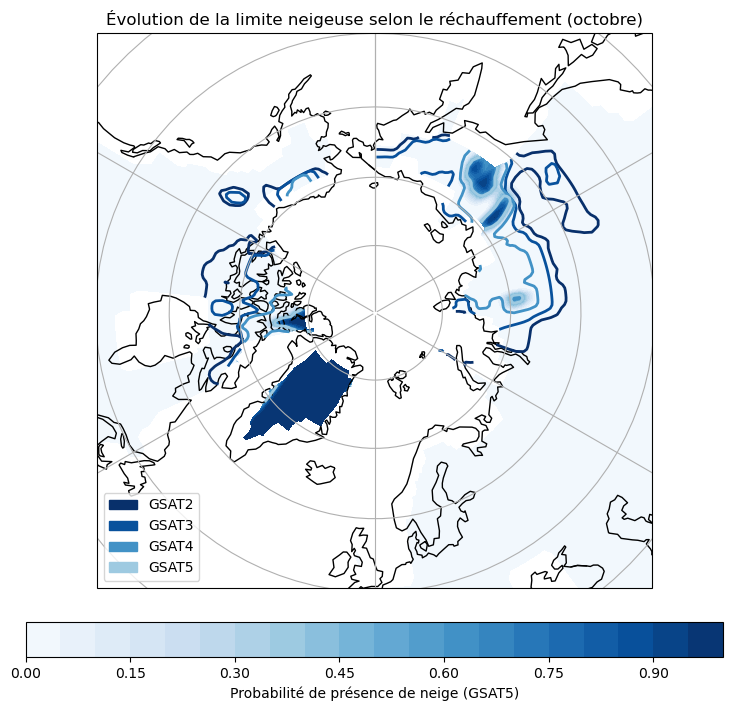

In [72]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from scipy.ndimage import gaussian_filter

# Extraire les données
da2 = snc_gsat2_binary_50[9].values.astype(float)
da3 = snc_gsat3_binary_50[9].values.astype(float)
da4 = snc_gsat4_binary_50[9].values.astype(float)
da5 = snc_gsat5_binary_50.sel(month=10).values.astype(float)

lon = snc_gsat2_binary_50[9].lon.values
lat = snc_gsat2_binary_50[9].lat.values

# Appliquer un léger lissage pour éviter le rendu pixelisé
sigma = 1.0
da2_smooth = gaussian_filter(da2, sigma=sigma)
da3_smooth = gaussian_filter(da3, sigma=sigma)
da4_smooth = gaussian_filter(da4, sigma=sigma)
da5_smooth = gaussian_filter(da5, sigma=sigma)

# Carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(9, 9))
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

# Fond : remplissage basé sur le scénario le plus chaud (GSAT5)
cmap = plt.cm.Blues
cf = ax.contourf(lon, lat, da5_smooth, levels=np.linspace(0, 1, 21), cmap=cmap, transform=ccrs.PlateCarree())

# Tracer les isocontours à 0.5
ax.contour(lon, lat, da2_smooth, levels=[0.5], colors=['#08306B'], linewidths=2, transform=ccrs.PlateCarree(), linestyles='solid')
ax.contour(lon, lat, da3_smooth, levels=[0.5], colors=['#08519C'], linewidths=2, transform=ccrs.PlateCarree(), linestyles='solid')
ax.contour(lon, lat, da4_smooth, levels=[0.5], colors=['#4292C6'], linewidths=2, transform=ccrs.PlateCarree(), linestyles='solid')
ax.contour(lon, lat, da5_smooth, levels=[0.5], colors=['#9ECAE1'], linewidths=2, transform=ccrs.PlateCarree(), linestyles='solid')

# Coastlines et grille
ax.coastlines()
ax.gridlines(draw_labels=False)

# Barre de couleur
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.05)
cbar.set_label('Probabilité de présence de neige (GSAT5)')

# Légende manuelle
import matplotlib.patches as mpatches
patches = [
	mpatches.Patch(color='#08306B', label='GSAT2'),
	mpatches.Patch(color='#08519C', label='GSAT3'),
	mpatches.Patch(color='#4292C6', label='GSAT4'),
	mpatches.Patch(color='#9ECAE1', label='GSAT5'),
]
plt.legend(handles=patches, loc='lower left')

plt.title("Évolution de la limite neigeuse selon le réchauffement (octobre)")
plt.show()

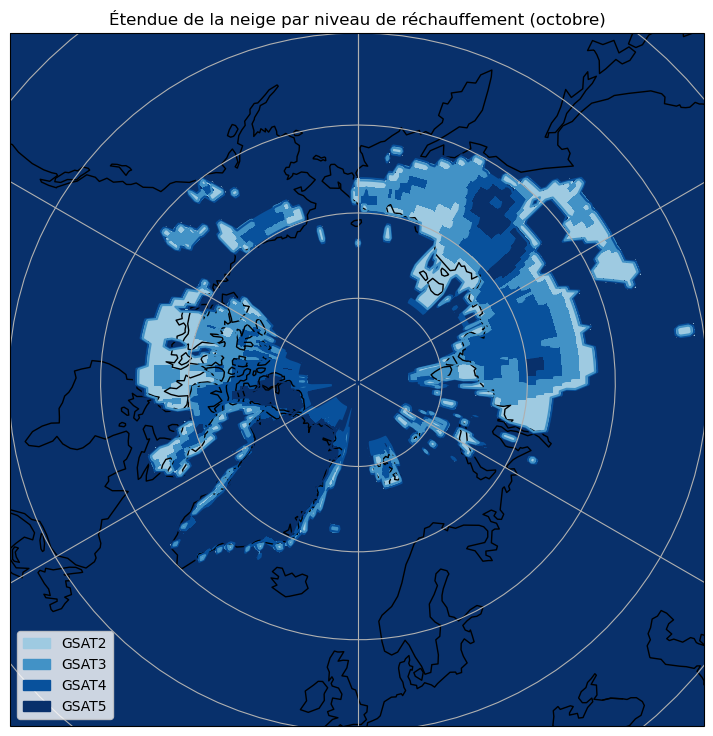

In [77]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Récupérer les données binaires (0/1)
da2 = snc_gsat2_binary_50[9].values
da3 = snc_gsat3_binary_50[9].values
da4 = snc_gsat4_binary_50[9].values
da5 = snc_gsat5_binary_50.sel(month=10).values

lon = snc_gsat2_binary_50[9].lon.values
lat = snc_gsat2_binary_50[9].lat.values

# Créer une "carte d'indice de réchauffement" : 0 = pas de neige à aucun scénario
snow_class = np.zeros_like(da5)

# Remplir du plus froid vers le plus chaud
snow_class[da5 == 1] = 1
snow_class[(snow_class == 0) & (da4 == 1)] = 2
snow_class[(snow_class == 0) & (da3 == 1)] = 3
snow_class[(snow_class == 0) & (da2 == 1)] = 4

# Définir une palette de bleus discrets
colors = ['#08306B', '#08519C', '#4292C6', '#9ECAE1']  # du foncé (GSAT2) au clair (GSAT5)
cmap = mcolors.ListedColormap(colors)
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Tracer
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(9, 9))
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

# Remplissage
cf = ax.pcolormesh(lon, lat, snow_class, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')

# Contours pour chaque classe
contour_colors = colors
levels = [1, 2, 3, 4]
for lvl, col in zip(levels, contour_colors):
	ax.contour(lon, lat, snow_class, levels=[lvl], colors=[col], linewidths=1.5, transform=ccrs.PlateCarree())

# Coastlines et légende
ax.coastlines()
ax.gridlines(draw_labels=False)

legend_patches = [
	mpatches.Patch(color=colors[3], label="GSAT2"),
	mpatches.Patch(color=colors[2], label="GSAT3"),
	mpatches.Patch(color=colors[1], label="GSAT4"),
	mpatches.Patch(color=colors[0], label="GSAT5"),
]
plt.legend(handles=legend_patches, loc="lower left")

plt.title("Étendue de la neige par niveau de réchauffement (octobre)")
plt.show()

## Moyenne multi-modèles avec application des scores fonction exponentielle

In [92]:
scores_modeles = pd.read_csv("~/private-storage/fichiers_csv/scores_modeles.csv", index_col=0)
scores_modeles

,Erreur_moyenne,Scores_exp,Scores_gauss
modele_x,,,
MRI_ESM2_0,1.362947e+06,1.000000,1.000000
FGOALS_f3_L,1.662308e+06,0.972355,0.993733
CIESM,1.855681e+06,0.954906,0.983111
IPSL_CM6A_LR,1.953967e+06,0.946157,0.975792
CanESM5,2.134752e+06,0.930274,0.959070
NorESM2_MM,2.155630e+06,0.928457,0.956875
NorESM2_LM,2.191774e+06,0.925319,0.952949
CESM2_WACCM,2.304067e+06,0.915640,0.939753
BCC_CSM2_MR,2.405671e+06,0.906969,0.926558


In [93]:
snow_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_snc = os.path.join("/home/jovyan/private-storage/interp_models_SW/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", files.replace("SW_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/interp_sftlf_bis/", files.replace("SW", "sftlf"))
                                 
    ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
    sftlf = ds_sftlf["sftlf"]
    snc = extraction_variable(ds_snc)

    snow_cover_dict[model_name] = snc

La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variabl

In [94]:
for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        print(f"{model}: {da['type'].values}")

CanESM5: b'land'
CNRM-CM6-1: b'typeland'
CNRM-CM6-1-HR: b'typeland'
CNRM-ESM2-1: b'typeland'
GISS-E2-1-G: b'land'
HadGEM3-GC31-LL: b'land'
IPSL-CM6A-LR: b'typeland'
MIROC-ES2L: b'land'
MIROC6: b'land'
MRI-ESM2-0: b'land'
UKESM1-0-LL: b'land'


In [95]:
cleaned_snc = []
model_names = []

for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        da = da.drop_vars('type')

    cleaned_snc.append(da)
    model_names.append(model)

In [96]:
all_snc = xr.concat(cleaned_snc, dim=xr.DataArray(model_names, dims="model"))

In [97]:
all_snc

<xarray.DataArray 'sncbin' (model: 25, GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 696MB
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * model    (model) <U15 2kB 'BCC-CSM2-MR' 'CanESM5' ... 'UKESM1-0-LL'

In [98]:
# création du vecteur de poids de chaque modèle suivant score obtenu
weights = xr.DataArray(
    scores_modeles["Scores_exp"],
    coords = {"modele_x": scores_modeles.index},
    dims="modele_x"
)

In [99]:
weights = weights.rename({"modele_x": "model"})
weights = weights.assign_coords(
    model=[m.replace("_", "-") for m in weights.model.values]
)

In [105]:
weighted = all_snc * weights
weighted

<xarray.DataArray (model: 25, GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 1GB
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * model    (model) <U15 2kB 'BCC-CSM2-MR' 'CanESM5' ... 'UKESM1-0-LL'

In [102]:
all_snc, weights = xr.align(all_snc, weights, join="inner")

In [103]:
weights

<xarray.DataArray 'Scores_exp' (model: 25)> Size: 200B
array([0.90696927, 0.93027384, 0.89691399, 0.89220285, 0.91564008,
       0.95490593, 0.84089984, 0.83397922, 0.88508598, 0.37705308,
       0.36787944, 0.97235536, 0.90374966, 0.69834618, 0.84066953,
       0.71860265, 0.94615719, 0.89117939, 0.90146063, 0.45551546,
       0.46872166, 1.        , 0.92531948, 0.9284568 , 0.87639263])
Coordinates:
  * model    (model) <U15 2kB 'BCC-CSM2-MR' 'CanESM5' ... 'UKESM1-0-LL'

In [110]:
mean_snc_pondere = weighted.mean(dim="model")

In [111]:
snc_gsat2_pondere = mean_snc_pondere.sel(GSAT=2.0, method="nearest")
snc_gsat3_pondere = mean_snc_pondere.sel(GSAT=3.0, method="nearest")
snc_gsat4_pondere = mean_snc_pondere.sel(GSAT=4.0, method="nearest")
snc_gsat5_pondere = mean_snc_pondere.sel(GSAT=5.0, method="nearest")

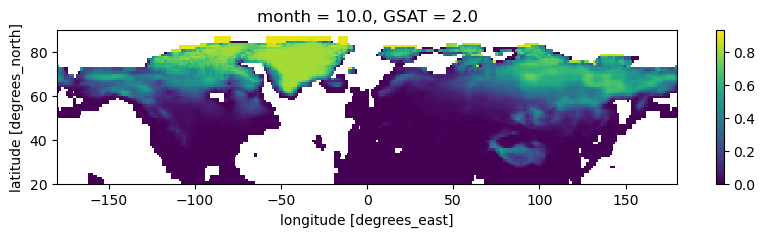

In [112]:
plt.figure(figsize=(10,2))
snc_gsat2_pondere[9].plot()

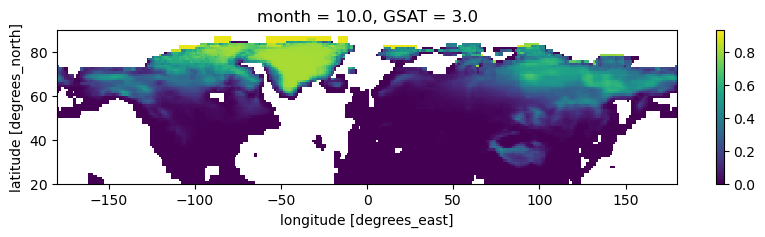

In [113]:
plt.figure(figsize=(10,2))
snc_gsat3_pondere[9].plot()

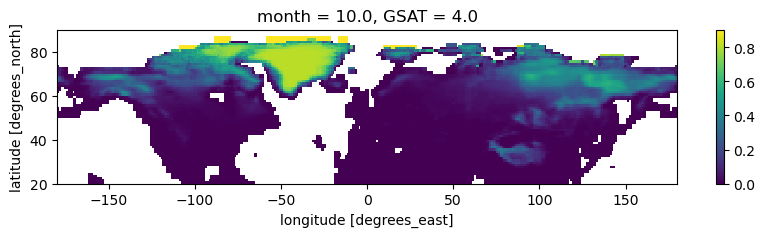

In [114]:
plt.figure(figsize=(10,2))
snc_gsat4_pondere[9].plot()

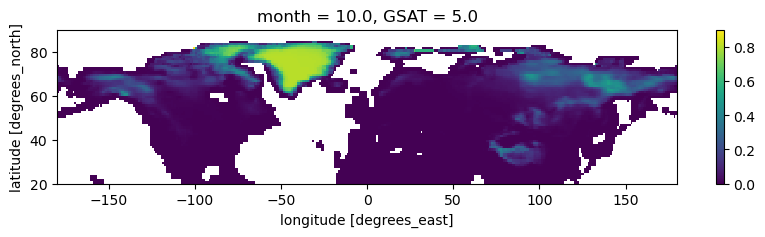

In [115]:
plt.figure(figsize=(10,2))
snc_gsat5_pondere[9].plot()

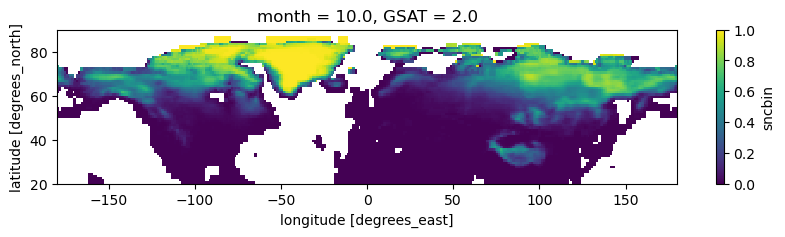

In [109]:
plt.figure(figsize=(10,2))
snc_gsat2[9].plot()

In [116]:
snc_binary_50_pondere = xr.where(mean_snc_pondere >= 0.5, 1, 0)

#on garde les nan initiaux
snc_binary_50_pondere = snc_binary_50_pondere.where(~mean_snc.isnull())

In [117]:
snc_gsat2_binary_50_pondere = snc_binary_50_pondere.sel(GSAT=2.0, method="nearest")
snc_gsat3_binary_50_pondere = snc_binary_50_pondere.sel(GSAT=3.0, method="nearest")
snc_gsat4_binary_50_pondere = snc_binary_50_pondere.sel(GSAT=4.0, method="nearest")
snc_gsat5_binary_50_pondere = snc_binary_50_pondere.sel(GSAT=5.0, method="nearest")

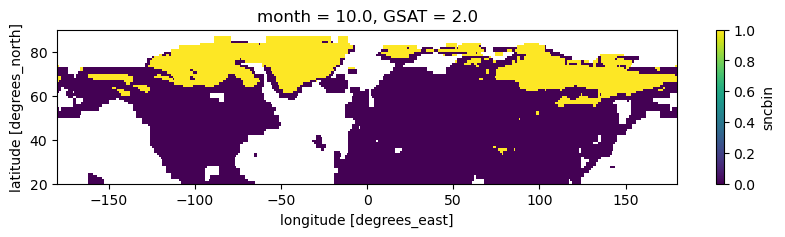

In [119]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_50[9].plot()

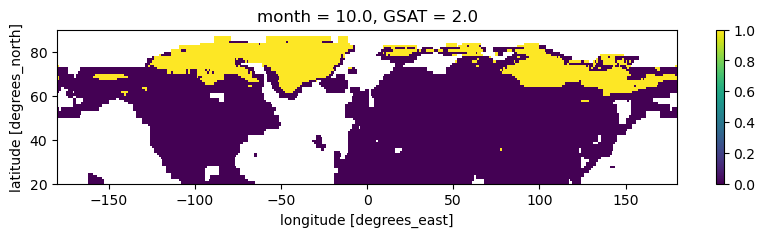

In [120]:
plt.figure(figsize=(10,2))
snc_gsat2_binary_50_pondere[9].plot()